In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

## Modeling Small Sample (Riding Mower Data)

Load our mower data

In [2]:
mower_df = pd.read_csv('../../Data/RidingMowers.csv')

Create an unconstrained (un-pruned) decision tree on all the data

In [3]:
classTree = DecisionTreeClassifier(random_state=0)
_ = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

Display the resulting tree

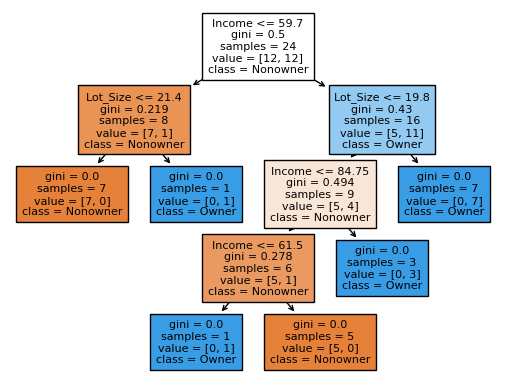

In [4]:
#fig = plt.figure(figsize=(7,5), dpi=150)
_ = plot_tree(classTree, 
                feature_names=mower_df.columns,  
                class_names=classTree.classes_,
                filled=True,
                fontsize=8
             )

Notice that this tree fits the data perfectly. The common problem with Decision trees, if there is no limits placed on the decision tree, it will give you 100% accuracy on the training data set because in the worse case it will end up making 1 leaf for each observation. Unless thre gorwth of the tree is controled in some way, decision trees will overfit the training data and thus perform poorly on new data.

## The ways we can limit a decision tree's growth

### Limit tree depth

In [5]:
# tree depth = 1
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)
_ = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

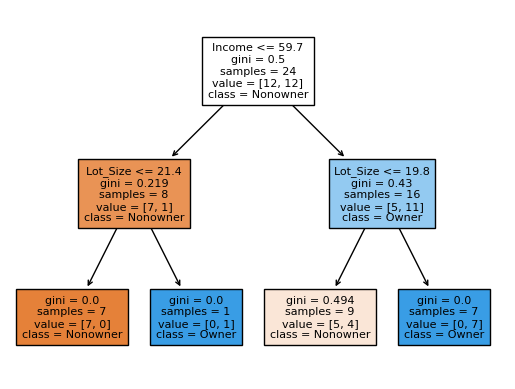

In [6]:
#fig = plt.figure(figsize=(3,2), dpi=150)
_ = plot_tree(classTree, 
                feature_names=mower_df.columns,  
                class_names=classTree.classes_,
                filled=True,
                fontsize=8
             )

In [7]:
# mac leaf nodes = 3
classTree = DecisionTreeClassifier(random_state=0, max_leaf_nodes=2)
_ = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

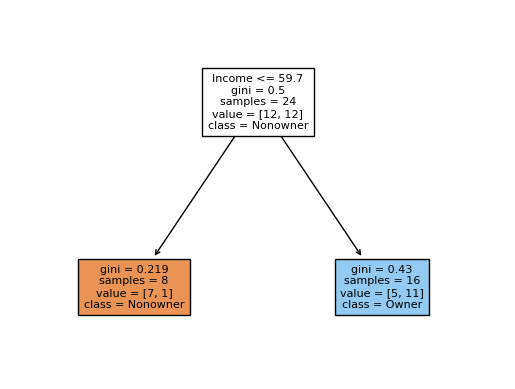

In [8]:
#fig = plt.figure(figsize=(6,4), dpi=150)
_ = plot_tree(classTree, 
                feature_names=mower_df.columns,  
                class_names=classTree.classes_,
                filled=True,
                fontsize=8
             )

In [9]:
classTree = DecisionTreeClassifier(random_state=0, min_impurity_decrease=.2)
_ = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

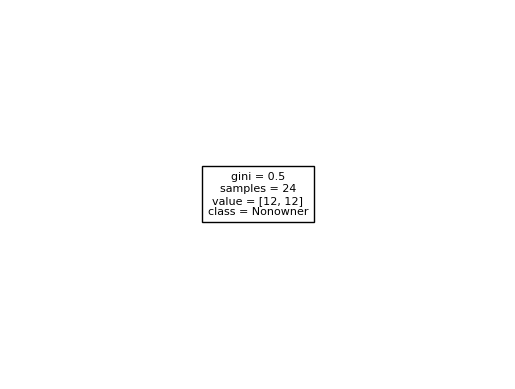

In [10]:
#fig = plt.figure(figsize=(7,5), dpi=150)
_ = plot_tree(classTree, 
                feature_names=mower_df.columns,  
                class_names=classTree.classes_,
                filled=True,
                fontsize=8
             )

In [11]:
classTree = DecisionTreeClassifier(random_state=0, min_samples_split=7)
_ = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

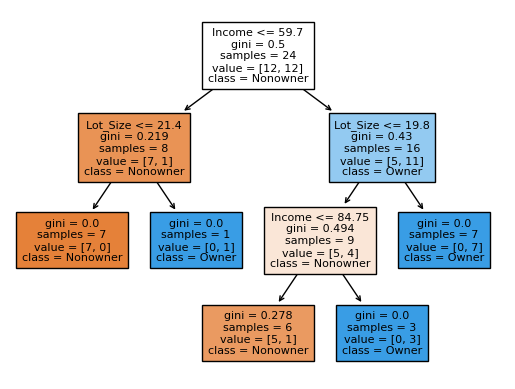

In [12]:
#fig = plt.figure(figsize=(7,6), dpi=150)
_ = plot_tree(classTree, 
                feature_names=mower_df.columns,  
                class_names=classTree.classes_,
                filled=True,
                fontsize=8
             )

In [13]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=4, max_leaf_nodes = 3)
_ = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

In [14]:
mower_df[:2].columns

Index(['Income', 'Lot_Size', 'Ownership'], dtype='object')

In [15]:
mower_df.columns[:2]

Index(['Income', 'Lot_Size'], dtype='object')

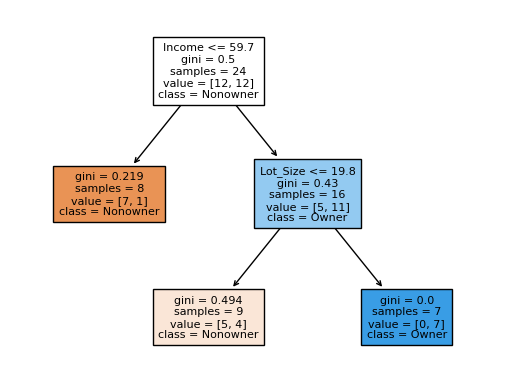

In [16]:
#fig = plt.figure(figsize=(7,7), dpi=150)
_ = plot_tree(classTree, 
                feature_names=mower_df.columns,  
                class_names=classTree.classes_,
                filled=True,
                fontsize=8
             )

## Larger Data Sets (Universal Bank)

In [17]:
# load data
bank_df = pd.read_csv('https://raw.githubusercontent.com/timcsmith/MIS536-Public/master/Data/UniversalBank.csv')
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)


In [18]:
# clean data (we're just going to drop the two non-predictor columns)
X_names = list(bank_df.columns)
X_names.remove('Personal Loan')
X = bank_df[X_names]
y = bank_df['Personal Loan']

In [19]:
# 70/30 train test split 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
# Create a full, non-pruned, tree
classTree = DecisionTreeClassifier(random_state=1)
_ = classTree.fit(train_X, train_y)

In [21]:
classTree.classes_

array([0, 1])

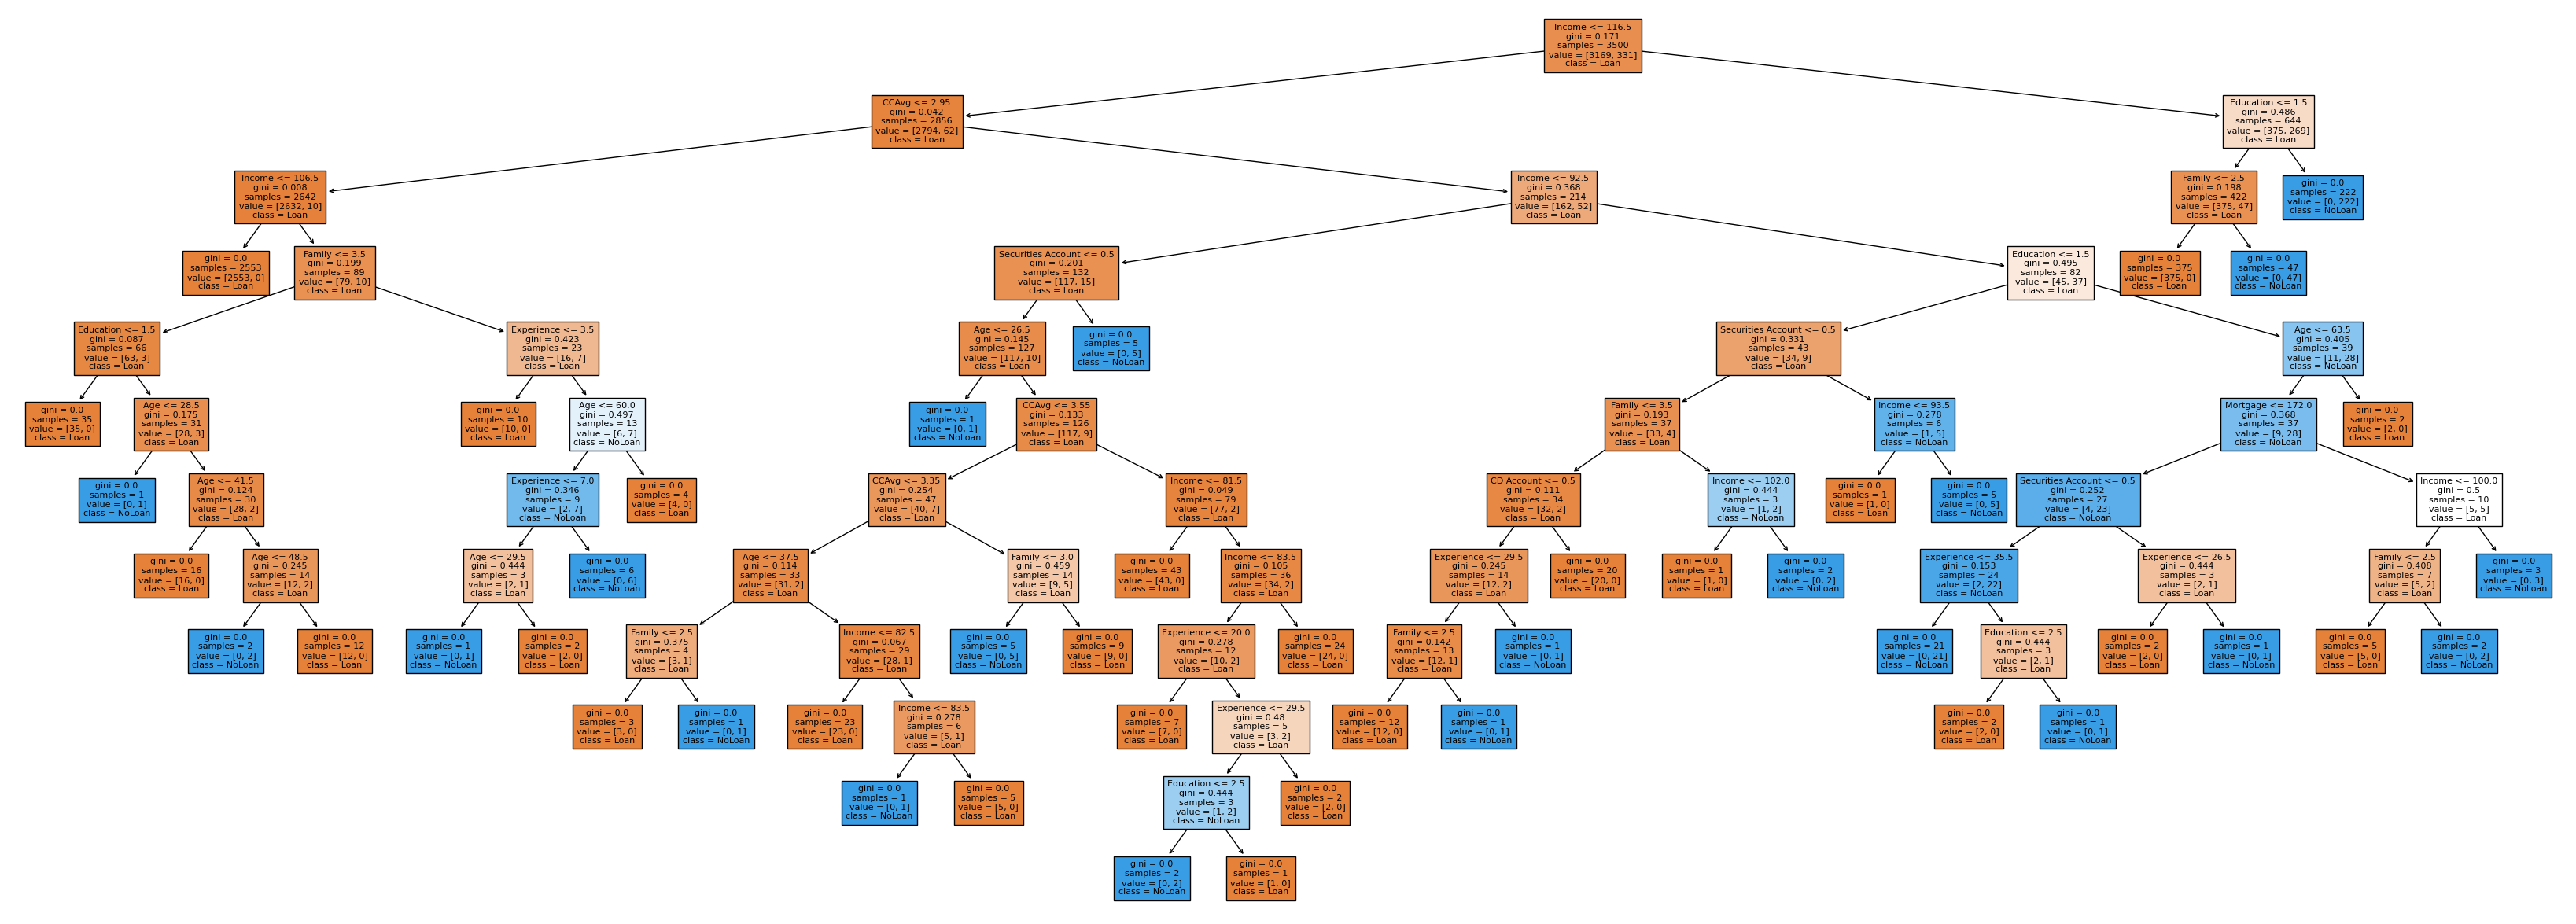

In [22]:
fig = plt.figure(figsize=(42,15), dpi=100)
_ = plot_tree(classTree, 
                feature_names=bank_df.columns,  
                class_names=['Loan', 'NoLoan'],
                filled=True,
                fontsize=8
             )
fig.savefig('ubank_demo.svg') # note: you can save figures as files (and insert these into a document, or other)
fig.savefig('ubank_demo.png') # note: you can save figures as files (and insert these into a document, or other)


For demonstration purposes, let's look at how well the decision tree fits the training data

In [23]:
print(f"Accuracy=", accuracy_score(train_y, classTree.predict(train_X)))
print(f"Precision=", precision_score(train_y, classTree.predict(train_X)))
print(f"Recall=", recall_score(train_y, classTree.predict(train_X)))
print(f"f1=", f1_score(train_y, classTree.predict(train_X)))

Accuracy= 1.0
Precision= 1.0
Recall= 1.0
f1= 1.0


As we have discussed, before, decision trees have high variance (that it, they tend to fit the data perfectly) unless this is controlled for by pruning (or, as we will see later, using techniques such as boosting and bagging)

Let's look at how well our decision tree model fits the test data.

In [24]:
print(f"Accuracy=", accuracy_score(test_y, classTree.predict(test_X)))
print(f"Precision=", precision_score(test_y, classTree.predict(test_X)))
print(f"Recall=", recall_score(test_y, classTree.predict(test_X)))      
print(f"f1=", f1_score(test_y, classTree.predict(test_X)))

Accuracy= 0.98
Precision= 0.9103448275862069
Recall= 0.8859060402684564
f1= 0.8979591836734694


Also, now that we've learning about classification reports on multiclass data, we can also apply this to our binary dataset (note: the values we get from our precision, recall, and f1 are on the "Loan" row.

In [25]:
print(classification_report(test_y, classTree.predict(test_X), target_names=['NoLoan', 'Loan']))

              precision    recall  f1-score   support

      NoLoan       0.99      0.99      0.99      1351
        Loan       0.91      0.89      0.90       149

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



## Cross Validation

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. 

![cross validation diagram](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


### Which value of k to use?

The value of 10 for k has been found through experimentation to generally result in a model skill estimate with low bias a modest variance (in more advanced analysis this can be refined, but for our purposes use it as a "rule of thumb"). See Slide in Class01, and Class07.

In [26]:
treeClassifier = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(treeClassifier, train_X, train_y, cv=10)
scores.mean()

0.9860000000000001

In [27]:
precision = cross_val_score(treeClassifier, train_X, train_y, cv=10, scoring='precision')
precision.mean()

0.9363035478120867

In [28]:
precision = cross_val_score(treeClassifier, train_X, train_y, cv=10, scoring='recall')
precision.mean()

0.91524064171123

## Hyperparameter Tuning


When tuning a model (especially decision tree models), there are often many parameter values that you'd like to test. Trying different values and exploring results is called 'hyperparameter' tuning. In this section, I demonstrate the use of this feature. 



In [29]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionTree = gridSearch.best_estimator_


precision score:  0.9865908432338453
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 80}


In [30]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecallTree = gridSearch.best_estimator_

recall score:  0.9243315508021391
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 2}


In [31]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyTree = gridSearch.best_estimator_

accuracy score:  0.9894285714285715
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [32]:
print("*****************")
print("Best Accuracy Tree")
print(classification_report(test_y, bestAccuracyTree.predict(test_X)))
print("*****************")
print("Best Recall Tree")
print(classification_report(test_y, bestPrecisionTree.predict(test_X)))
print("*****************")
print("Best Recall Tree")
print(classification_report(test_y, bestRecallTree.predict(test_X)))

*****************
Best Accuracy Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.93      0.88      0.90       149

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500

*****************
Best Recall Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.94      0.87      0.90       149

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500

*****************
Best Recall Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.93      0.88      0.90       149

    accuracy                           0.98      1500
   macro avg       0.

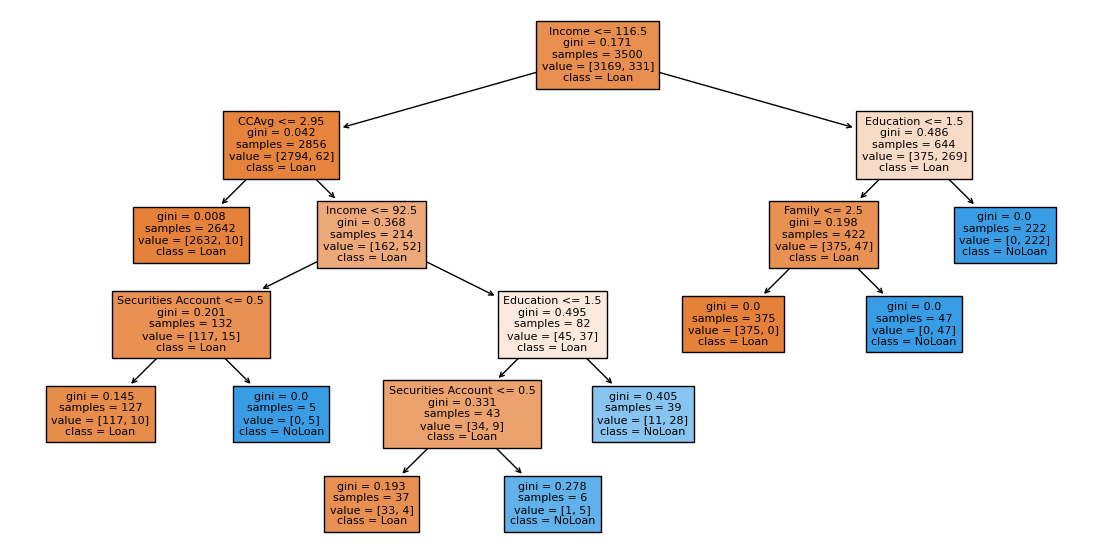

In [33]:
#plotDecisionTree(bestAccuracyTree, feature_names=train_X.columns)

fig = plt.figure(figsize=(14,7), dpi=100)
_ = plot_tree(bestAccuracyTree, 
                feature_names=bank_df.columns,  
                class_names=['Loan', 'NoLoan'],
                filled=True,
                fontsize=8
             )

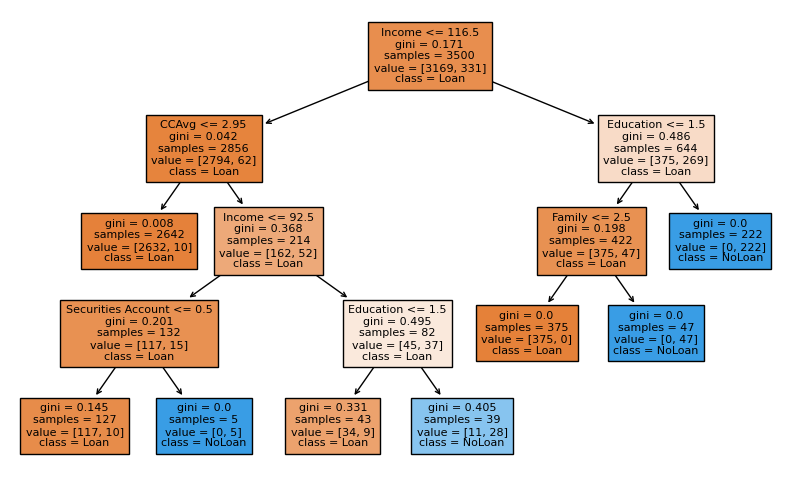

In [34]:
fig = plt.figure(figsize=(10,6), dpi=100)
_ = plot_tree(bestPrecisionTree, 
                feature_names=bank_df.columns,  
                class_names=['Loan', 'NoLoan'],
                filled=True,
                fontsize=8
             )


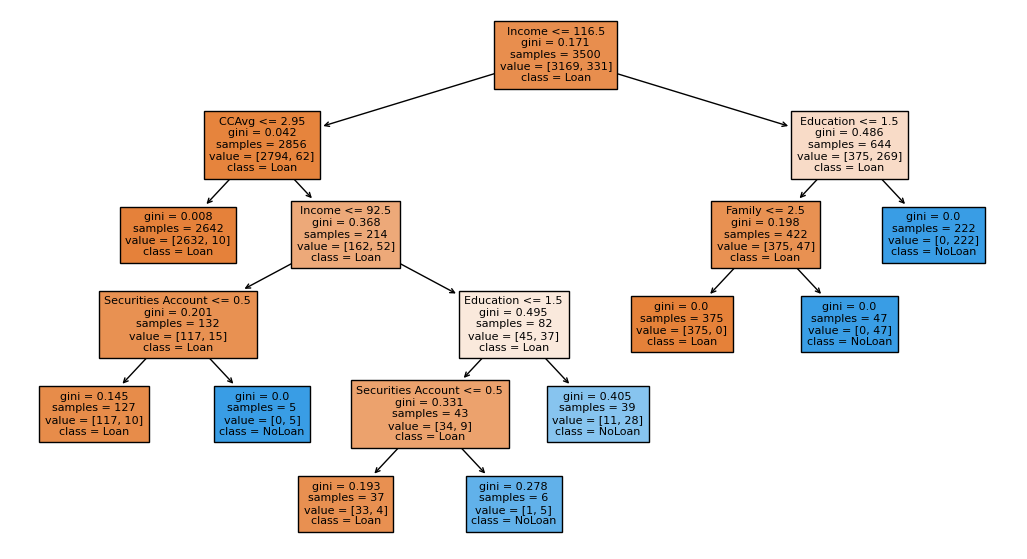

In [35]:
fig = plt.figure(figsize=(13,7), dpi=100)
_ = plot_tree(bestRecallTree, 
                feature_names=bank_df.columns,  
                class_names=['Loan', 'NoLoan'],
                filled=True,
                fontsize=8
             )

## Hyperparamater Tuning with k-NN

Hyper parameter tuning is not limited to decision trees, we can apply it to any modeling technqiue for which we'd like to explore different parameter values and the resulting performance of the model with these parameters.

In [36]:
# Load the data direct from GitHub
bank_df = pd.read_csv('https://github.com/timcsmith/MIS536-Public/raw/master/Data/UniversalBank.csv')

bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

# translation education categories into dummy vars
bank_df['Education'] = bank_df['Education'].astype('category')
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=False)

# 70/70 train test split
train_df, validation_df = train_test_split(bank_df, test_size=0.4, random_state=1)
print('Training set:', train_df.shape, 'Validation set:', validation_df.shape)

# creat list of that are our predictors (X), and outcome (y)
y = 'Personal Loan'
X = list(bank_df.columns)
X.remove(y)

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[X])

# Transform the predictors of training, validation and newCustomer
train_X= scaler.transform(train_df[X])
train_y = train_df[y]
valid_X = scaler.transform(validation_df[X])
valid_y = validation_df[y]

Training set: (3000, 14) Validation set: (2000, 14)


Let's check the performance of a few k-NN values manually.

In [37]:


# train model k=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(train_X, train_y)
print("**** 1-NN model")
print("Accuracy score:", accuracy_score(valid_y, knn1.predict(valid_X)))
print("Precision score:", precision_score(valid_y, knn1.predict(valid_X)))
print("Recall score:", recall_score(valid_y, knn1.predict(valid_X)))


# train model k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(train_X, train_y)
print("**** 3-NN model")
print("Accuracy score:", accuracy_score(valid_y, knn3.predict(valid_X)))
print("Precision score:", precision_score(valid_y, knn3.predict(valid_X)))
print("Recall score:", recall_score(valid_y, knn3.predict(valid_X)))

# train model k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(train_X, train_y)
accuracy_score(valid_y, knn5.predict(valid_X))
print("**** 5-NN model")
print("Accuracy score:", accuracy_score(valid_y, knn5.predict(valid_X)))
print("Precision score:", precision_score(valid_y, knn5.predict(valid_X)))
print("Recall score:", recall_score(valid_y, knn5.predict(valid_X)))

**** 1-NN model
Accuracy score: 0.9545
Precision score: 0.8493150684931506
Recall score: 0.6424870466321243
**** 3-NN model
Accuracy score: 0.9535
Precision score: 0.9166666666666666
Recall score: 0.5699481865284974
**** 5-NN model
Accuracy score: 0.9565
Precision score: 0.9649122807017544
Recall score: 0.5699481865284974


Let's now use the GridSearchCV to explore a range of k values. Let's also explore two different distance measures, euclidean and cosine (see [here](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) for a documentation on the various metrics available in sklearn).

In [38]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,49,2)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_

accuracy score:  0.966
parameters:  {'metric': 'cosine', 'n_neighbors': 3}


In [39]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,49,2)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionKnn = gridSearch.best_estimator_

precision score:  0.969584216952638
parameters:  {'metric': 'euclidean', 'n_neighbors': 9}


In [40]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,49,2)),
    'metric': ['euclidean', 'cosine']    
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)


bestRecallKnn = gridSearch.best_estimator_

recall score:  0.7001231527093597
parameters:  {'metric': 'cosine', 'n_neighbors': 3}


How SKLearn handles ties (and why you should choose odd values of k): "Warning: Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but but different labels, the results will depend on the ordering of the training data."


So, which of the above models it the 'best' one? As we have seen in past classes, the best metric to optimize for in this problem is recall. 

The best decision tree model we found:
```
   recall score:  0.9243315508021391
   parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 2}
```

The best k-NN model we dfound:
```
   recall score:  0.7001231527093597
   parameters:  {'metric': 'cosine', 'n_neighbors': 3}
```

Therefore, the best Decision Tree model we found significantly outperforms the best k-NN model we found.

NOTE: Decision tree's are not affected by data imbalance as k-NN. Notice that in our analysis, we did not address the data imbalance. Can you update this analysis to address the data imbalance for the k-NN model? After doing this, is the decision tree model still the 'best'? Support your answer with actual measures you found.
